## **Burgers' Equation in 2D**

The coupled Burgers' equations are:

$$
\begin{aligned}
    \frac{\partial{u}}{\partial{t}} + u\frac{\partial{u}}{\partial{x}} + v\frac{\partial{u}}{\partial{y}} = \nu \left(\frac{\partial^{2}{u}}{\partial^{2}{x}} + \frac{\partial^{2}{u}}{\partial^{2}{y}}\right)\\
    \frac{\partial{v}}{\partial{t}} + u\frac{\partial{v}}{\partial{x}} + v\frac{\partial{v}}{\partial{y}} = \nu \left(\frac{\partial^{2}{v}}{\partial^{2}{x}} + \frac{\partial^{2}{v}}{\partial^{2}{y}}\right)\\
\end{aligned}
$$

These can be discretised as follows:

$$
\begin{aligned}
    \frac{u_{i,j}^{n + 1} - u_{i,j}^{n}}{\Delta{t}} + u_{i,j}^{n}\frac{u_{i,j}^{n} - u_{i - 1,j}^{n}}{\Delta{x}} + v_{i,j}^{n}\frac{u_{i,j}^{n} - u_{i - 1,j}^{n}}{\Delta{y}} = \nu \left(\frac{u_{i + 1,j}^{n} - 2u_{i,j}^{n} + u_{i - 1,j}^{n}}{\Delta{x^{2}}} + \frac{u_{i,j + 1}^{n} - 2u_{i,j}^{n} + u_{i,j - 1}^{n}}{\Delta{y^{2}}}\right)\\
    \frac{v_{i,j}^{n + 1} - v_{i,j}^{n}}{\Delta{t}} + u_{i,j}^{n}\frac{v_{i,j}^{n} - v_{i - 1,j}^{n}}{\Delta{x}} + v_{i,j}^{n}\frac{v_{i,j}^{n} - v_{i - 1,j}^{n}}{\Delta{y}} = \nu \left(\frac{v_{i + 1,j}^{n} - 2v_{i,j}^{n} + v_{i - 1,j}^{n}}{\Delta{x^{2}}} + \frac{v_{i,j + 1}^{n} - 2v_{i,j}^{n} + v_{i,j - 1}^{n}}{\Delta{y^{2}}}\right)\\
\end{aligned}
$$

We can solve for the unknown:

$$
\begin{aligned}
    u_{i,j}^{n + 1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta{t}}{\Delta{x}}(u_{i,j}^{n} - u_{i - 1,j}^{n}) - v_{i,j}^{n}\frac{\Delta{t}}{\Delta{y}}(u_{i,j}^{n} - u_{i,j - 1}^{n}) + \frac{\nu\Delta{t}}{\Delta{x^{2}}}(u_{i + 1,j}^{n} - 2u_{i,j}^{n} + u_{i - 1,j}^{n}) + \frac{\nu\Delta{t}}{\Delta{y^{2}}}(u_{i,j + 1}^{n} - 2u_{i,j}^{n} + u_{i,j - 1}^{n})\\
    v_{i,j}^{n + 1} = v_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta{t}}{\Delta{x}}(v_{i,j}^{n} - v_{i - 1,j}^{n}) - v_{i,j}^{n}\frac{\Delta{t}}{\Delta{y}}(v_{i,j}^{n} - v_{i,j - 1}^{n}) + \frac{\nu\Delta{t}}{\Delta{x^{2}}}(v_{i + 1,j}^{n} - 2v_{i,j}^{n} + v_{i - 1,j}^{n}) + \frac{\nu\Delta{t}}{\Delta{y^{2}}}(v_{i,j + 1}^{n} - 2v_{i,j}^{n} + v_{i,j - 1}^{n})\\
\end{aligned}
$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

comb = np.ones((ny, nx))

In [3]:
u[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2 
v[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2

(1.0, 2.0)

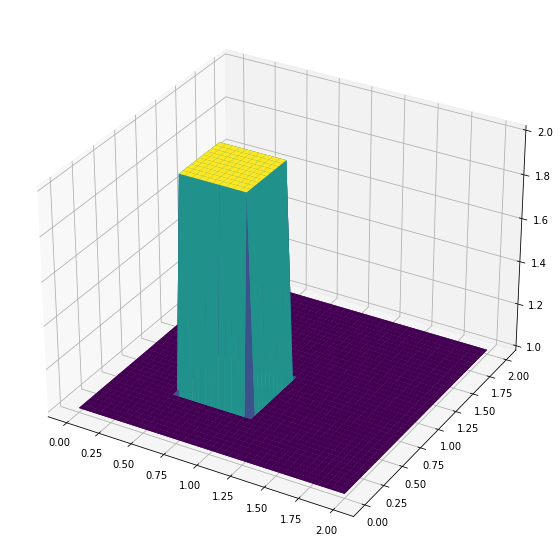

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis')
ax.plot_surface(X, Y, v, cmap='viridis')
ax.set_zlim(1, 2)

In [5]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx ** 2 * (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy ** 2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx ** 2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy ** 2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
    
    # boundary conditions
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

Text(0.5, 0.92, 'v')

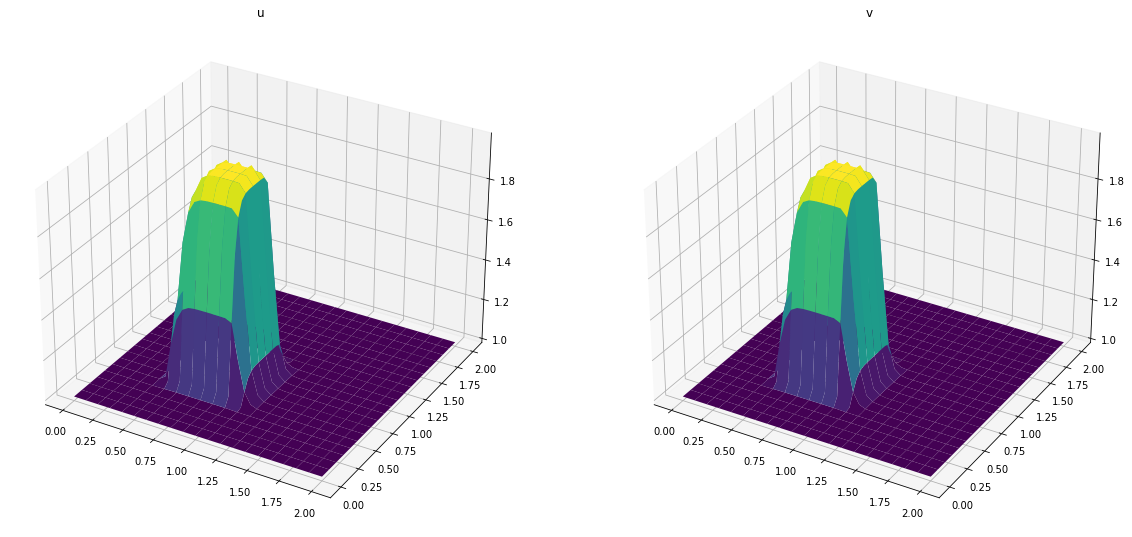

In [6]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis', rstride=2, cstride=2)
ax.set_title('u')

ax = fig.add_subplot(122, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap='viridis', rstride=2, cstride=2)
ax.set_title('v')